In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

img_eg = mpimg.imread("mouse.jpg")

img_eg = cv2.resize(img_eg, (400, 600))  
print(img_eg.shape)

(600, 400, 3)


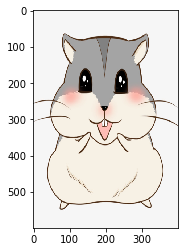

In [29]:
plt.imshow(img_eg)
plt.show()

In [30]:
rows, cols, channel = img_eg.shape

In [37]:
img_temp = img_eg.reshape(rows, cols * channel)
U,Sigma,VT = np.linalg.svd(img_temp)
print(U.shape, Sigma.shape, VT.shape)

(600, 600) (600,) (1200, 1200)


In [35]:
# 取前60个奇异值
sval_nums = 10
img_restruct1 = (U[:,0:sval_nums]).dot(np.diag(Sigma[0:sval_nums])).dot(VT[0:sval_nums,:])
img_restruct1 = img_restruct1.reshape(600,400,3)

# 取前120个奇异值
sval_nums = 120
img_restruct2 = (U[:,0:sval_nums]).dot(np.diag(Sigma[0:sval_nums])).dot(VT[0:sval_nums,:])
img_restruct2 = img_restruct2.reshape(600,400,3)

[Text(0.5, 1.0, 'nums of sigma = 120')]

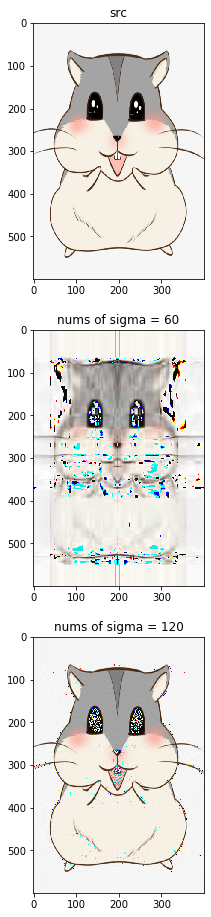

In [36]:
fig, ax = plt.subplots(3,1,figsize = (16,16))

ax[0].imshow(img_eg)
ax[0].set(title = "src")
ax[1].imshow(img_restruct1.astype(np.uint8))
ax[1].set(title = "nums of sigma = 60")
ax[2].imshow(img_restruct2.astype(np.uint8))
ax[2].set(title = "nums of sigma = 120")